In [47]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

import itertools as it
import math

# make the graph prettier (seaborn uses matplotlib but with better defaults)
sns.set_style("darkgrid")

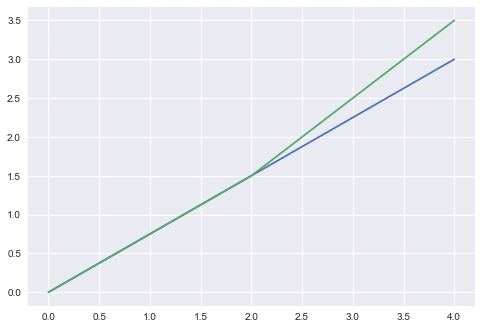

In [22]:
def graph(f, step_num):
    # f is a recurrence function, not a "math" function mapping from x to y
    x = np.arange(step_num)
    y = np.array(list(it.accumulate(range(step_num), f)))
    plt.plot(x, y)

def adapter(opening_function, f, changeover):
    # returns a function which doesn't adapt until it has been called "enough" 
    opener = it.repeat(opening_function, changeover)
    funcs = it.chain(opener, it.repeat(f))
    def combined(*args, **kwargs):
        return next(funcs)(*args, **kwargs)
        
    return combined
    
def cost_unadapted(x, _):
    return x + .75
    
def cost_adapted(x, _):
    return x + 1

def scenario_3_cost(adaptation):
    # returns the combined function, given an adaptation function
    return adapter(cost_unadapted, adaptation, 2)


unadapted = scenario_3_cost(cost_unadapted)
adapted = scenario_3_cost(cost_adapted)

graph(unadapted, 5)
graph(adapted, 5)
plt.show()

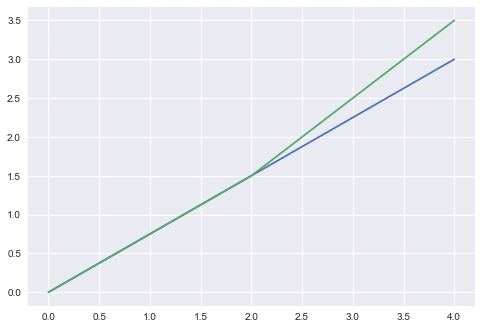

In [5]:
def derived_cost(n):
    # n device inputs
    # device sample rates are tiered at powers of 2
    # adding more inputs decreases the samples per input
    factor = math.ceil(math.log(n, 2))
    return lambda x, _: x + (1/2**factor) * n

graph(unadapted, 5)
graph(scenario_3_cost(derived_cost(2)), 5)
plt.show()

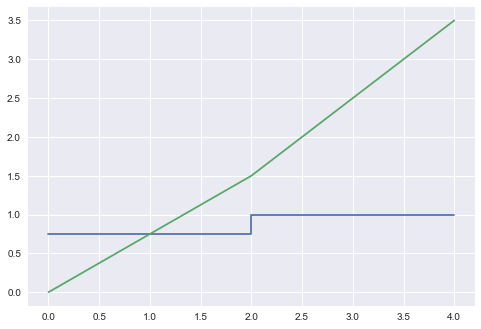

In [48]:
base = lambda _: .75
adapt = lambda _: 1

def graph2(f, step_num):
    # f is a "math" function mapping from x to y
    x = np.arange(step_num)
    y = list(map(f, x))
    plt.step(x, y)
    
def graph3(f, step_num):
    x = np.arange(step_num)
    values = list(map(f, x))
    # "integral" of instantaneous values
    y = np.cumsum(values)
    # remove initial value from array
    y = y - y[0]
    
    plt.plot(x, y)
    
    
graph2(adapter(base, adapt, 3), 5)   
graph3(adapter(base, adapt, 3), 5)
#graph2(base, 5)
plt.show()

(5.0, 5.551115123125783e-14)